# Solar Production vs CO2 Emissions

Need to determine hypothesis

In [1]:
## import dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats

In [2]:
## Import csv files
production_csv = pd.read_csv("input_data/SolarProduction.csv")
emissions_csv = pd.read_csv("input_data/emissions.csv")

# Data Munging

In [3]:
production_df = pd.DataFrame (production_csv)

production_df.drop(["2018","Grand Total"], axis=1, inplace=True)
production_df= production_df.rename(columns={"STATE": "State"})

## Need to drop the rows'US-TOTAL' and 'Grand Total
full_prod_df = production_df[~production_df['State'].isin(["US-TOTAL", "Grand Total"])]

full_prod_df.head()

,State,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,AL,0,0,0,0.00,0,0.00,0.00,0,62522,361376
1,AR,0,0,0,0.00,0,0.00,0.00,1854,52284,61624
2,AZ,29448,28290,31508,166697.56,1910886,4222877.28,6283015.71,6913216,7531650,9884002
3,CA,1340962,1294780,1538662,1777658.80,2764600,7627449.58,19863629.72,29628768,37613423,48705833
4,CO,36708,51170,84996,209271.22,330898,496904.92,506130.00,502742,1076218,1908996


In [4]:
emissions_df = pd.DataFrame (emissions_csv)

## Production data is not available for the states AK, DC, ND, NJ, and WV - Need to drop from emissions data too
full_emis_df = emissions_df[~emissions_df['State'].isin(["AK", "DC", "ND", "NJ", "WV"])]

full_emis_df.head()

,State,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,AL,139.666603,120.020443,132.722932,129.812612,123.039324,120.732885,123.080771,120.012608,114.872696,109.018634
2,AZ,102.125070,93.252826,95.204594,93.282044,91.256850,95.060822,93.120620,90.856296,86.971877,86.137839
3,AR,64.059757,61.367031,65.723403,67.168798,65.940126,68.354108,68.985869,59.176044,62.319791,64.277677
4,CA,379.480916,366.184902,360.953079,346.864178,351.496006,354.219000,351.477053,359.290429,359.261859,360.913489
5,CO,97.064224,92.931686,95.398725,91.694520,90.609881,91.185686,91.833738,90.542532,87.183832,87.582932


# Create data sets for a smaller set of states

In [5]:
## Need to narrow production data set to the five states we are analyzing
short_prod_df = full_prod_df.loc[full_prod_df["State"].isin(["OH", "PA", "VT", "WA", "TX"])]

short_prod_df

,State,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
31,OH,0,0,25696,30990.00,73274,92619.08,107816.54,112144,131116,210356
34,PA,350,7124,15819,46288.06,64294,126211.62,124784.84,127788,149610,139233
39,TX,0,0,16416,57278.00,236530,326025.86,564702.60,801518,1461620,4378254
43,VT,0,0,0,3630.00,10128,34586.00,47071.94,96044,118062,197602
44,WA,0,0,0,1680.00,1588,1524.00,1458.00,1580,1454,962


In [6]:
## Need to narrow emissions data set to the five states we are analyzing'
short_emis_df = full_emis_df.loc[full_emis_df["State"].isin(["OH", "PA", "VT", "WA", "TX"])]

short_emis_df

,State,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
35,OH,259.915008,234.975715,247.141718,235.368188,215.376323,229.601220,231.666146,212.891632,206.407588,205.621802
38,PA,267.457907,242.407980,254.419583,247.126263,236.353959,246.092075,245.894238,229.691958,216.636771,216.650887
43,TX,643.698700,611.110086,648.818958,666.708188,662.002423,696.845756,693.485215,693.100945,695.363753,710.994283
45,VT,5.901652,6.132742,5.854555,5.782272,5.430809,5.720077,5.867586,6.125115,5.917026,5.833906
47,WA,75.157759,72.977136,73.044555,68.149752,67.912628,72.679159,71.204237,73.062390,78.443075,78.732677


In [7]:
## Check that length of the dataframes are the same length
print(len(full_prod_df))
print(len(full_emis_df))
print(len(short_prod_df))
print(len(short_emis_df))

46
46
5
5


# Transpose the full dataframes

In [8]:
## Transpose DF so the states are the columsn
full_prod_T_df = full_prod_df.T

## Make the first row of the df the column headers
full_prod_state_df = full_prod_T_df.rename(columns=full_prod_T_df.iloc[0]).drop(full_prod_T_df.index[0])
full_prod_state_df.head()

,AL,AR,AZ,CA,CO,CT,DE,FL,GA,HI,...,SC,SD,TN,TX,UT,VA,VT,WA,WI,WY
2008,0,0,29448,1340962,36708,0,0,0,0,36,...,0,0,0,0,0,0,0,0,0,0
2009,0,0,28290,1294780,51170,0,0,18940,0,2780,...,0,0,0,0,0,0,0,0,0,0
2010,0,0,31508,1538662,84996,0,0,160880,0,3540,...,0,0,0,16416,0,0,0,0,0,0
2011,0,0,166698,1.77766e+06,209271,0,16559.6,251452,0,7186,...,0,0,0,57278,0,0,3630,1680,0,0
2012,0,0,1910886,2764600,330898,0,45118,387232,5842,9216,...,0,0,24366,236530,3238,0,10128,1588,0,0


In [9]:
## Transpose DF so the states are the columsn
full_emis_T_df = full_emis_df.T

## Make the first row of the df the column headers
full_emis_state_df = full_emis_T_df.rename(columns=full_emis_T_df.iloc[0]).drop(full_emis_T_df.index[0])
full_emis_state_df.head()

,AL,AZ,AR,CA,CO,CT,DE,FL,GA,HI,...,SC,SD,TN,TX,UT,VT,VA,WA,WI,WY
2008,139.667,102.125,64.0598,379.481,97.0642,37.4768,15.5884,237.797,171.747,19.3092,...,84.5141,14.9481,120.319,643.699,69.1792,5.90165,116.179,75.1578,104.64,66.8148
2009,120.02,93.2528,61.367,366.185,92.9317,35.7206,11.9393,223.44,161.816,18.8905,...,79.0042,14.7035,101.811,611.11,64.3779,6.13274,105.126,72.9771,95.6817,63.5834
2010,132.723,95.2046,65.7234,360.953,95.3987,36.0508,11.2321,241.444,171.352,19.0346,...,83.268,15.0496,109.403,648.819,63.6403,5.85456,108.299,73.0446,98.0888,65.1485
2011,129.813,93.282,67.1688,346.864,91.6945,34.6509,12.1916,228.355,156.026,19.4718,...,79.3817,14.5807,105.878,666.708,64.0889,5.78227,99.4596,68.1498,97.2215,63.9547
2012,123.039,91.2569,65.9401,351.496,90.6099,33.9293,13.3161,222.06,135.838,18.9306,...,72.8389,14.9517,99.4676,662.002,61.3869,5.43081,97.4156,67.9126,90.0237,66.2403


# Summary Statistics of full data frames

In [11]:
# Production summary statistics of over 10 years

summary_df=full_prod_df[["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]]\
.agg(['sum','mean', "median", "var", "std", "sem"]).T.rename(columns={'sum':'Total','mean':'Avg', 'median': "Median", "var": "Variance", "std": "STD", "sem": "SEM"})
summary_df

,Total,Avg,Median,Variance,STD,SEM
2008,1.728630e+06,3.757891e+04,0.00,4.072968e+10,2.018160e+05,2.975614e+04
2009,1.782360e+06,3.874696e+04,0.00,3.851792e+10,1.962598e+05,2.893693e+04
2010,2.424364e+06,5.270357e+04,0.00,5.481394e+10,2.341238e+05,3.451967e+04
2011,3.635391e+06,7.903025e+04,0.00,7.644763e+10,2.764916e+05,4.076647e+04
2012,8.653352e+06,1.881163e+05,965.00,2.623433e+11,5.121946e+05,7.551897e+04
2013,1.807124e+07,3.928531e+05,4806.00,1.636432e+12,1.279231e+06,1.886123e+05
2014,3.538206e+07,7.691753e+05,21509.23,9.257421e+12,3.042601e+06,4.486071e+05
2015,4.978581e+07,1.082300e+06,41647.00,1.990381e+13,4.461369e+06,6.577929e+05
2016,7.210824e+07,1.567571e+06,73620.00,3.250008e+13,5.700884e+06,8.405495e+05
2017,1.065737e+08,2.316820e+06,191143.00,5.496198e+13,7.413635e+06,1.093081e+06


In [66]:
# Emissions summary statistics of over 10 years

summary_emis_df=full_emis_df[["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]]\
.agg(['sum','mean', "median", "var", "std", "sem"]).T.rename(columns={'sum':'Total','mean':'Avg', 'median': "Median", "var": "Variance", "std": "STD", "sem": "SEM"})
summary_emis_df

,Total,Avg,Median,Variance,STD,SEM
2008,5473.690359,118.993269,87.771587,13268.400239,115.188542,16.983624
2009,5102.328582,110.920187,82.532657,11739.301829,108.348059,15.975050
2010,5290.375602,115.008165,86.909944,12962.407332,113.852568,16.786645
2011,5157.207114,112.113198,83.432372,13036.409148,114.177096,16.834494
2012,4952.842073,107.670480,77.178650,12584.765672,112.181842,16.540310
2013,5090.938881,110.672584,77.749222,13618.853976,116.699846,17.206454
2014,5127.964345,111.477486,78.990633,13589.215643,116.572791,17.187720
2015,4992.929945,108.541955,75.491956,13376.208092,115.655558,17.052482
2016,4905.396129,106.639046,76.491403,13270.141090,115.196098,16.984738
2017,4879.645917,106.079259,77.762632,13723.857745,117.148870,17.272659


In [12]:
# Production summary statistics of all states

summary2_df=full_prod_state_df[["AL", "AR", "AZ", "CA", "CO", "CT", 
        "DE", "FL", "GA", "HI", "IA", "ID", "IL", "IN", "KS", "KY", 
        "LA", "MA", "MD", "ME", "MI", "MN", "MO", "MS", "MT", "NC", 
        "NE", "NJ", "NM", "NV", "NY", "OH", "OK", "OR", "PA", "RI",
        "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA","WI", "WY"]]\
.agg(['sum','mean', "median", "var", "std", "sem"]).T.rename(columns={'sum':'Total','mean':'Avg', 'median': "Median", "var": "Variance", "std": "STD", "sem": "SEM"})
summary2_df.head()

,Total,Avg,Median,Variance,STD,SEM
AL,4.238980e+05,4.238980e+04,0.00,1.294807e+10,1.137896e+05,3.598343e+04
AR,1.157620e+05,1.157620e+04,0.00,5.771653e+08,2.402426e+04,7.597139e+03
AZ,3.700159e+07,3.700159e+06,3066881.64,1.403233e+13,3.745975e+06,1.184581e+06
CA,1.521558e+08,1.521558e+07,5196024.79,3.132379e+14,1.769853e+07,5.596766e+06
CO,5.204034e+06,5.204034e+05,413901.46,3.349582e+11,5.787557e+05,1.830186e+05


# Summart Statistics of short data frames

In [32]:
# Production summary statistics of the short list of states

short_prod_sum_df=full_prod_state_df[["OH", "PA", "VT", "WA", "TX"]].agg(["sum", "mean", "median", "var", "std", "sem"])\
.T.rename(columns={'sum':'Total','mean':'Avg', 'median': "Median", "var": "Variance", "std": "STD", "sem": "SEM"})
short_prod_sum_df.head()

,Total,Avg,Median,Variance,STD,SEM
OH,784011.62,78401.162,82946.54,4.415817e+09,6.645161e+04,21013.844846
PA,801502.52,80150.252,94539.42,3.548463e+09,5.956898e+04,18837.365723
VT,507123.94,50712.394,22357.00,4.446653e+09,6.668323e+04,21087.089085
WA,10246.00,1024.600,1456.00,5.367103e+05,7.326051e+02,231.670082
TX,7842344.46,784234.446,281277.93,1.809146e+12,1.345045e+06,425340.571221


In [33]:
# Emissions summary statistics of the short list of states

short_emis_sum_df=full_emis_state_df[["OH", "PA", "VT", "WA", "TX"]].agg(["sum", "mean", "median", "var", "std", "sem"])\
.T.rename(columns={'sum':'Total','mean':'Avg', 'median': "Median", "var": "Variance", "std": "STD", "sem": "SEM"})
short_emis_sum_df.head()

,Total,Avg,Median,Variance,STD,SEM
OH,2278.965340,227.896534,230.633683,317.606376,17.821514,5.635658
PA,2402.731621,240.273162,244.151109,255.569240,15.986533,5.055386
VT,58.565740,5.856574,5.861071,0.040015,0.200038,0.063258
WA,731.363368,73.136337,73.010846,13.300118,3.646933,1.153261
TX,6722.128307,672.212831,679.904566,973.778085,31.205418,9.868019


In [27]:
##Set state as the index in both of the short state lists dataframes
#short_emis_df.set_index("State", inplace=True)
#short_prod_df.set_index("State", inplace=True)

#put the states into a list to use on the scatterplot
state_list = list(short_emis_df.index)

# Linear Regression

In [15]:
# Linear regression function
def linear_regression(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values, marker="o",c=y_values, cmap = "winter" )
    plt.plot(x_values,regress_values,"r-")
    return [line_eq, rvalue]

# Line annotation function
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-squared is : 0.12878676884804094


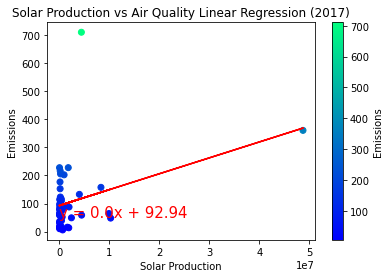

In [16]:
equation = linear_regression(full_prod_df["2017"], full_emis_df["2017"])
year = "2017"
annotate(equation[0], 40, 50)

plt.title(f"Solar Production vs Air Quality Linear Regression ({year})")
plt.xlabel("Solar Production")
plt.ylabel("Emissions")
clb = plt.colorbar()
clb.set_label('Emissions')

print(f"The r-squared is : {equation[1]**2}")


The r-squared is : 0.12327305279655479


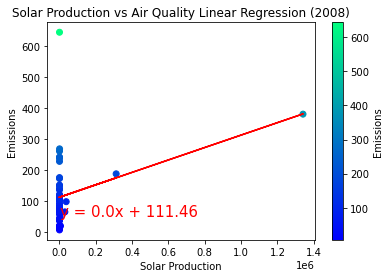

In [17]:
equation = linear_regression(full_prod_df["2008"], full_emis_df["2008"])
year = "2008"
annotate(equation[0], 10, 50)

plt.title(f"Solar Production vs Air Quality Linear Regression ({year})")
plt.xlabel("Solar Production")
plt.ylabel("Emissions")
clb = plt.colorbar()
clb.set_label('Emissions')

print(f"The r-squared is : {equation[1]**2}")

The r-squared is : 0.10867113860130609


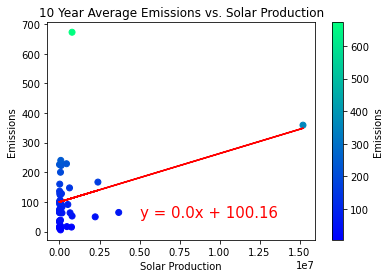

In [19]:
equation = linear_regression(full_prod_df.mean(axis=1), full_emis_df.mean(axis=1))

annotate(equation[0], 5000000, 50)

plt.title(f"10 Year Average Emissions vs. Solar Production")
plt.xlabel("Solar Production")
plt.ylabel("Emissions")
clb = plt.colorbar()
clb.set_label('Emissions')

print(f"The r-squared is : {equation[1]**2}")
plt.savefig('prod_vs_emis_correlation.png')

The r-squared is : 0.8904155473029318


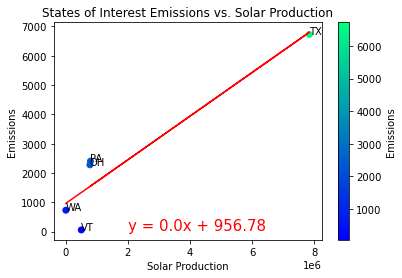

In [20]:
equation = linear_regression(short_prod_df.sum(axis=1), short_emis_df.sum(axis=1))
x_values = short_prod_df.sum(axis=1)
y_values = short_emis_df.sum(axis=1)

annotate(equation[0], 2000000, 50)

plt.title(f"States of Interest Emissions vs. Solar Production")
plt.xlabel("Solar Production")
plt.ylabel("Emissions")
clb = plt.colorbar()
clb.set_label('Emissions')

for i, name in enumerate(state_list):
     plt.annotate(name, (x_values[i], y_values[i]))

print(f"The r-squared is : {equation[1]**2}")
plt.savefig('short_prod_vs_emis_correlation.png')

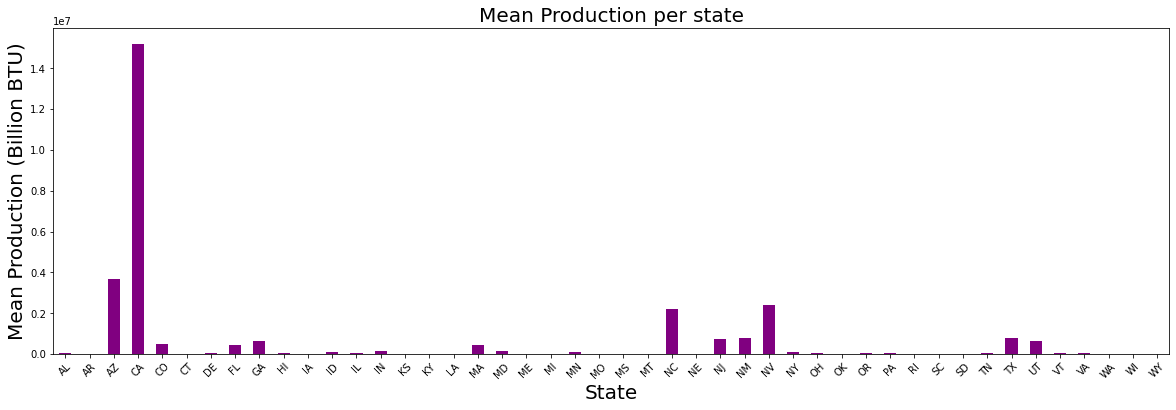

In [21]:
# Bar chart of the median production by state

production_total_state = summary2_df["Avg"]
production_total_state.head(50).plot(kind='bar', figsize=(20,6), facecolor = "purple")

plt.title("Mean Production per state", fontsize = 20)
plt.xlabel("State", fontsize = 20)
plt.xticks(rotation = 45)
plt.ylabel("Mean Production (Billion BTU)", fontsize = 20)
plt.show()

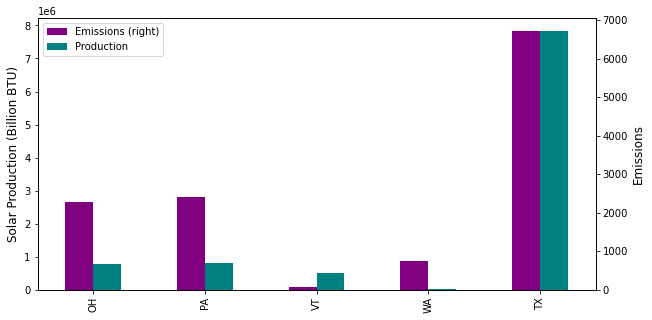

In [65]:
# Bar chart of the total production and emissions for the states of interest

fivestate_prod_total = short_prod_sum_df["Total"]
fivestate_emis_total = short_emis_sum_df["Total"]


fivedf = pd.DataFrame ({
    "Emissions": fivestate_emis_total,
    "Production": fivestate_prod_total
    })

fivedf

fivedf.plot(kind='bar', secondary_y= 'Emissions', figsize=(10,5), color=('purple', "teal"))

plt.xlabel("State", fontsize = 10)
plt.xticks(rotation = 0)
ax1, ax2 = plt.gcf().get_axes() # gets the current figure and then the axes
ax1.set_ylabel('Solar Production (Billion BTU)', fontsize = 12)
ax2.set_ylabel('Emissions', fontsize = 12)
plt.savefig('short_prod_vs_emis_barchart.png')

# Line chart of production and emissions

Text(0, 0.5, 'Emissions')

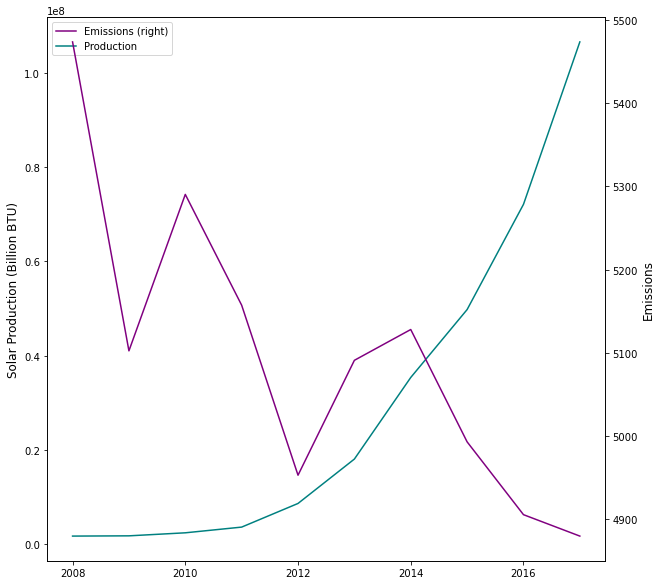

In [77]:
# Bar chart of the total production and emissions for the states of interest

total_prod = summary_df["Total"]
total_emis = summary_emis_df["Total"]


fivedf = pd.DataFrame ({
    "Emissions": total_emis,
    "Production": total_prod
    })

fivedf

fivedf.plot(kind='line', secondary_y= 'Emissions', figsize=(10,10), color=('purple', "teal"))

plt.xlabel("State", fontsize = 10)
plt.xticks(rotation = 0)
ax1, ax2 = plt.gcf().get_axes() # gets the current figure and then the axes
ax1.set_ylabel('Solar Production (Billion BTU)', fontsize = 12)
ax2.set_ylabel('Emissions', fontsize = 12)

# Merge Data Sets

In [23]:
## Merge the 2 dataframes
merge_df = pd.merge(emissions_df, production_df, how='inner', on='State', suffixes=('_emis', '_con'))

merge_df.head()

,State,2008_emis,2009_emis,2010_emis,2011_emis,2012_emis,2013_emis,2014_emis,2015_emis,2016_emis,...,2008_con,2009_con,2010_con,2011_con,2012_con,2013_con,2014_con,2015_con,2016_con,2017_con
0,AL,139.666603,120.020443,132.722932,129.812612,123.039324,120.732885,123.080771,120.012608,114.872696,...,0,0,0,0.00,0,0.00,0.00,0,62522,361376
1,AZ,102.125070,93.252826,95.204594,93.282044,91.256850,95.060822,93.120620,90.856296,86.971877,...,29448,28290,31508,166697.56,1910886,4222877.28,6283015.71,6913216,7531650,9884002
2,AR,64.059757,61.367031,65.723403,67.168798,65.940126,68.354108,68.985869,59.176044,62.319791,...,0,0,0,0.00,0,0.00,0.00,1854,52284,61624
3,CA,379.480916,366.184902,360.953079,346.864178,351.496006,354.219000,351.477053,359.290429,359.261859,...,1340962,1294780,1538662,1777658.80,2764600,7627449.58,19863629.72,29628768,37613423,48705833
4,CO,97.064224,92.931686,95.398725,91.694520,90.609881,91.185686,91.833738,90.542532,87.183832,...,36708,51170,84996,209271.22,330898,496904.92,506130.00,502742,1076218,1908996
